In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_palette('cool')


ModuleNotFoundError: No module named 'xgboost'

In [129]:
#Lendo conjunto de dados
train = pd.read_csv('D:\\Users\\313432\\Desktop\\code\\train.csv')
test = pd.read_csv('D:\\Users\\313432\\Desktop\\code\\test.csv')


In [130]:
#Obtendo primeiras 5 linhas
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
#Obtendo informação Null Values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [132]:
#Obtendo informação Null Values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [133]:
#Verificando a conversão dos dataset's - TESTE
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [134]:
#Verificando a conversão dos dataset's - TREINO
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
#Quantidade de valores nulos no conjunto de treino
train.isnull().sum().sort_values(ascending=False).head(10)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

In [136]:
#Quantidade de valores nulos no conjunto de teste
test.isnull().sum().sort_values(ascending=False).head(10)

Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

In [139]:
#Quantidade de valores nulos no conjunto de test
test.isnull().sum().sort_values(ascending=False).head(10)

Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

In [140]:
#obtendo ID do passageiro
passengerId = test['PassengerId']

In [141]:
#Dropando Id do Passageiro
train.drop(labels='PassengerId', axis=1, inplace=True)
test.drop(labels='PassengerId', axis=1, inplace=True)

In [142]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


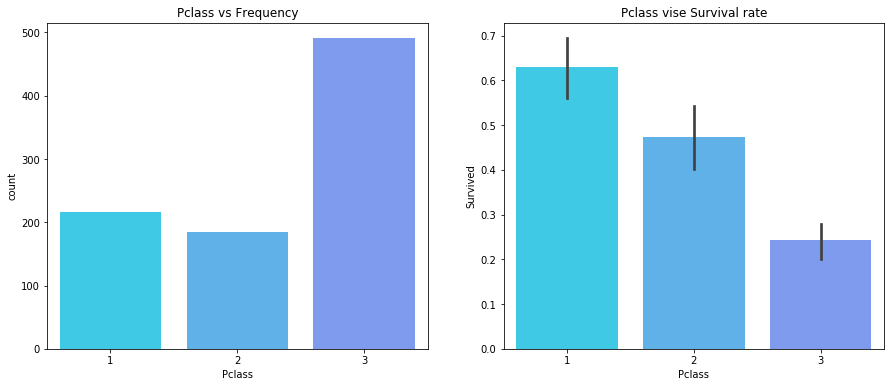

In [143]:
#Verificando quantidade de pessoas por classe x sobreviventes
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Pclass vs Frequency")
axes[1].set_title("Pclass vise Survival rate")
fig1_pclass = sns.countplot(data=train, x='Pclass', ax=axes[0])
fig2_pclass = sns.barplot(data=train, x='Pclass',y='Survived', ax=axes[1])

In [144]:
#verificando a proporção de sobreviventes entre as classes ( Pclass)

print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [145]:
#Testando uma nova feature com o nome, obtendo len do title
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

In [146]:
# Name Leangth
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
test['Name_Len'] = test['Name'].apply(lambda x: len(x))

In [147]:
#Dropando a feature do nome
train.drop(labels='Name', axis=1, inplace=True)
test.drop(labels='Name', axis=1, inplace=True)

In [148]:
# Testado categorização da feature name_len / 10

test.Name_Len = (test.Name_Len/10).astype(np.int64)+1
train.Name_Len = (train.Name_Len/10).astype(np.int64)+1

In [149]:
#Agora que o titulo esta separado do nome, vamos verificar a relação de sobreviventes x Titulo
print(train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

        Title  Survived
0       Capt.  0.000000
1        Col.  0.500000
2        Don.  0.000000
3         Dr.  0.428571
4   Jonkheer.  0.000000
5       Lady.  1.000000
6      Major.  0.500000
7     Master.  0.575000
8       Miss.  0.697802
9       Mlle.  1.000000
10       Mme.  1.000000
11        Mr.  0.156673
12       Mrs.  0.792000
13        Ms.  1.000000
14       Rev.  0.000000
15       Sir.  1.000000
16        the  1.000000


In [150]:
#Agora que o titulo esta separado do nome, vamos verificar a name_len x sobrevivents
print (train[['Name_Len', 'Survived']].groupby(['Name_Len'], as_index=False).mean())

   Name_Len  Survived
0         2  0.220588
1         3  0.331776
2         4  0.493827
3         5  0.750000
4         6  0.800000
5         7  1.000000
6         9  1.000000


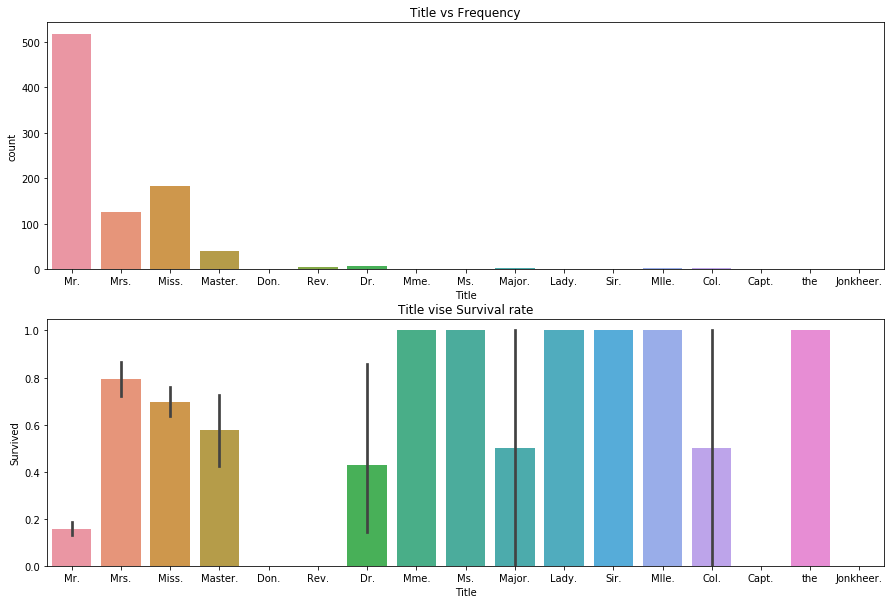

In [151]:
#Verificando a Frequencia dos titles, e relacionando a frequencia dos titles x Taxa de Sobrevivencia
fx, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title("Title vs Frequency")
axes[1].set_title("Title vise Survival rate")
fig1_title = sns.countplot(data=train, x='Title', ax=axes[0])
fig2_title = sns.barplot(data=train, x='Title',y='Survived', ax=axes[1])

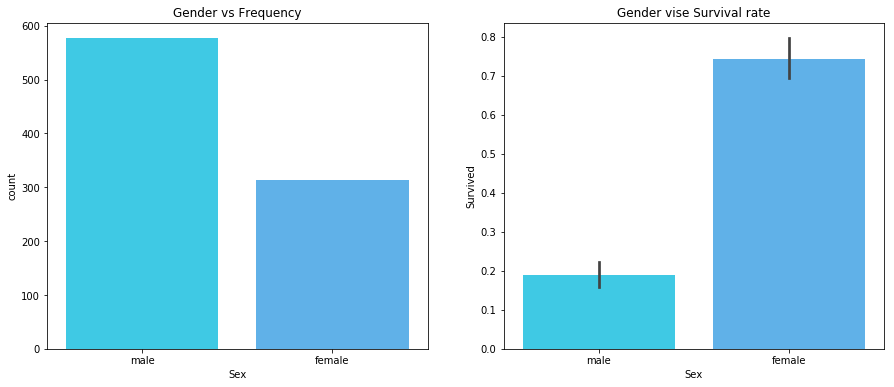

In [152]:
#Nas visualições acima, podemos ver que os titulos MRS,MISS e MS teum taxa de sobrevivencia maior.
#Verificando pelo sexo

fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Gender vs Frequency")
axes[1].set_title("Gender vise Survival rate")
fig1_gen = sns.countplot(data=train, x='Sex', ax=axes[0])
fig2_gen = sns.barplot(data=train, x='Sex', y='Survived', ax=axes[1])

In [153]:
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean())
#proporção de madculino e feminino, da pra observar que existem mais homens do que mulheres, porem mais mulheres sobreviveram.

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [154]:

#Verificando quantidade de valores nulos para variavel Age
train.Age.isnull().sum()
training_age_n = train.Age.dropna(axis=0)

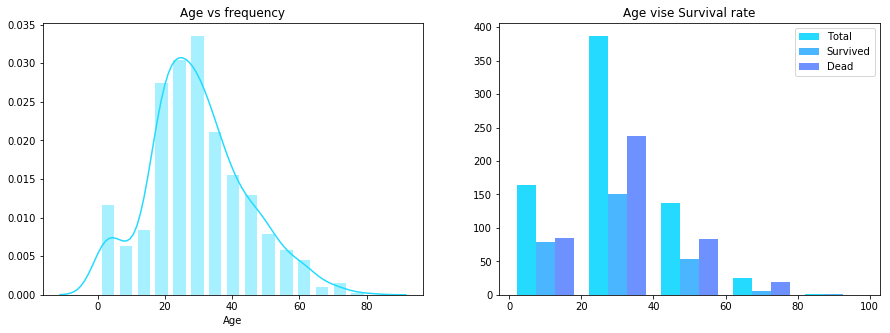

In [155]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title("Age vs frequency")
axes[1].set_title("Age vise Survival rate")
fig1_age = sns.distplot(a=training_age_n, bins=15, ax=axes[0], hist_kws={'rwidth':0.7})

# Criando dois grafico para realcionar a frequencia de idade na observação, e também relacionar os grupos em cada idade e verificar a taxa
# de sobrevivencia

pass_survived_age = train[train.Survived == 1].Age
pass_dead_age = train[train.Survived == 0].Age

axes[1].hist([train.Age, pass_survived_age, pass_dead_age], bins=5, range=(0, 100), label=['Total', 'Survived', 'Dead'])
axes[1].legend()
plt.show()

In [156]:
#Concatenando os dois dataset's e depois preenchendo os null_values
full_data = pd.concat([train, test])

In [157]:
#Abaixo para atribuição das idades Nulas utilizei a media,desvio padrao e quantidade de valores nulos na observação
#Set de Treinamento
train_age_mean = full_data.Age.mean()
train_age_std = full_data.Age.std()
train_age_null = train.Age.isnull().sum()
rand_tr_age = np.random.randint(train_age_mean - train_age_std, train_age_mean + train_age_std, size=train_age_null)
train['Age'][np.isnan(train['Age'])] = rand_tr_age
train['Age'] = train['Age'].astype(int) + 1

# Set de Test
test_age_mean = full_data.Age.mean()
test_age_std = full_data.Age.std()
test_age_null = test.Age.isnull().sum()
rand_ts_age = np.random.randint(test_age_mean - test_age_std, test_age_mean + test_age_std, size=test_age_null)
test['Age'][np.isnan(test['Age'])] = rand_ts_age
test['Age'] = test['Age'].astype(int)

train.Age = (train.Age/15).astype(np.int64)
test.Age = (test.Age/15).astype(np.int64) + 1

In [158]:

#Após a atribuição das datas aos valores nulos, vamos verificar a proporção de sobrevivencia em cada idade
print(train[['Age', 'Survived']].groupby(['Age'], as_index = False).mean())

   Age  Survived
0    0  0.591549
1    1  0.346561
2    2  0.386792
3    3  0.406250
4    4  0.230769
5    5  0.500000


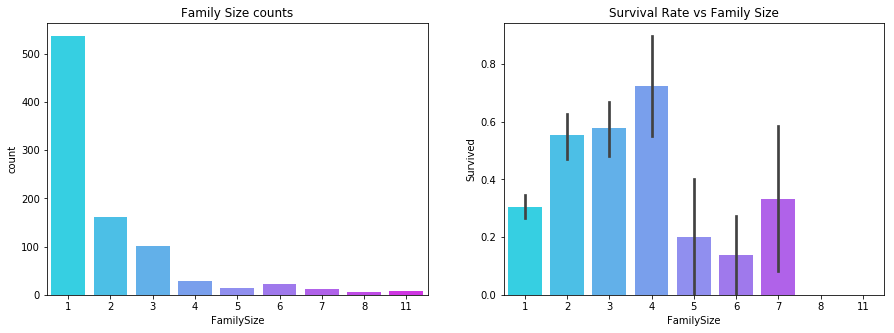

In [159]:
#Para identificarmos uma feature que pode influenciar na sobrevivencia, vou calcular o family size  = SibSp + Parch + 1

#Calculado treini
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
#Calculando Tetste
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Family Size counts')
axes[1].set_title('Survival Rate vs Family Size')
fig1_family = sns.countplot(x=train.FamilySize, ax=axes[0], palette='cool')
fig2_family = sns.barplot(x=train.FamilySize, y=train.Survived, ax=axes[1], palette='cool')

In [160]:
#Verificando proporção de sobreviventes pelo tamanho da familia
print(train[['FamilySize', 'Survived']].groupby(train['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0         1.0  0.303538
1         2.0  0.552795
2         3.0  0.578431
3         4.0  0.724138
4         5.0  0.200000
5         6.0  0.136364
6         7.0  0.333333
7         8.0  0.000000
8        11.0  0.000000


In [161]:
#Como podemos ver, quem viajou sozinho teve maiores chances de nao sobreviver.
#Dado este ponto, vamos verificar quem esta sozinho.
# wheather or not the passenger was alone ?

train['isAlone'] = train['FamilySize'].map(lambda x: 1 if x == 1 else 0)
test['isAlone'] = test['FamilySize'].map(lambda x: 1 if x == 1 else 0)

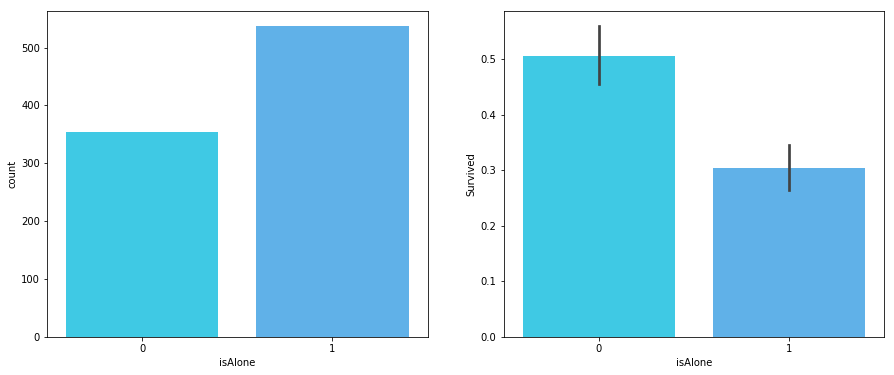

In [162]:
#Plotando o grafico com os dados de isAlone
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
fig1_alone = sns.countplot(data=train, x='isAlone', ax=axes[0])
fig2_alone = sns.barplot(data=train, x='isAlone', y='Survived', ax=axes[1])

In [163]:
#Apos o calculo da nova feature, vamos excluir da dimensao SibSp e Parch
train.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(labels=['SibSp', 'Parch'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone
0,0,3,male,1,A/5 21171,7.2500,NaN,S,Mr.,3,2,0
1,1,1,female,2,PC 17599,71.2833,C85,C,Mrs.,6,2,0
2,1,3,female,1,STON/O2. 3101282,7.9250,NaN,S,Miss.,3,1,1
3,1,1,female,2,113803,53.1000,C123,S,Mrs.,5,2,0
4,0,3,male,2,373450,8.0500,NaN,S,Mr.,3,1,1


In [164]:
#Testando uma nova feature com o ticket length
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))
test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))

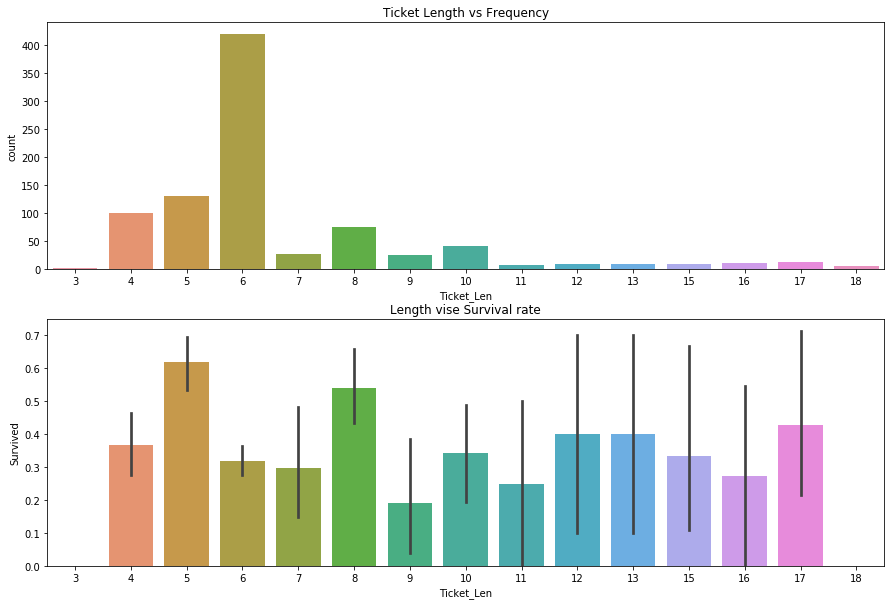

In [165]:
#Plotando relação de Ticket len x Sobreviventes
fx, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title("Ticket Length vs Frequency")
axes[1].set_title("Length vise Survival rate")
fig1_tlen = sns.countplot(data=train, x='Ticket_Len', ax=axes[0])
fig2_tlen = sns.barplot(data=train, x='Ticket_Len',y='Survived', ax=axes[1])

In [166]:
print(train[['Ticket_Len', 'Survived']].groupby(train['Ticket_Len'], as_index=False).mean())

    Ticket_Len  Survived
0          3.0  0.000000
1          4.0  0.366337
2          5.0  0.618321
3          6.0  0.319809
4          7.0  0.296296
5          8.0  0.539474
6          9.0  0.192308
7         10.0  0.341463
8         11.0  0.250000
9         12.0  0.400000
10        13.0  0.400000
11        15.0  0.333333
12        16.0  0.272727
13        17.0  0.428571
14        18.0  0.000000


In [167]:
#Após essa conversão, vamos retirar a feature de ticket do dataset
train.drop(labels='Ticket', axis=1, inplace=True)
test.drop(labels='Ticket', axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len
0,0,3,male,1,7.2500,NaN,S,Mr.,3,2,0,9
1,1,1,female,2,71.2833,C85,C,Mrs.,6,2,0,8
2,1,3,female,1,7.9250,NaN,S,Miss.,3,1,1,16
3,1,1,female,2,53.1000,C123,S,Mrs.,5,2,0,6
4,0,3,male,2,8.0500,NaN,S,Mr.,3,1,1,6


In [168]:
#Verificando preço da passagem
test.Fare.describe()


count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [169]:
#Preenchendo os valores nulos com a media
test['Fare'][np.isnan(test['Fare'])] = test.Fare.mean()

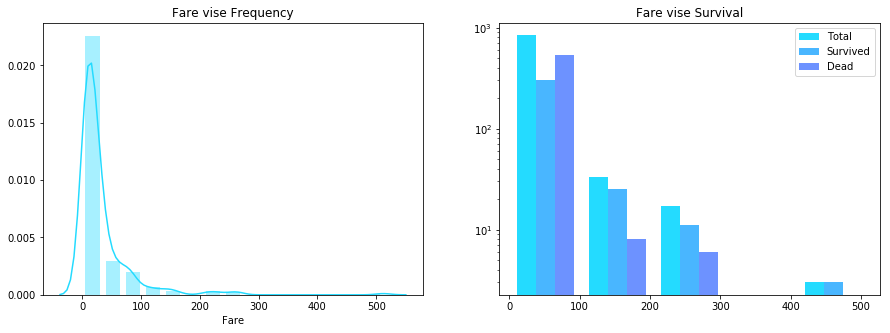

In [170]:
#Verificando frequencia das tarifas, e também a ´proporção de sobreviventes x valor da tarifa.
fx, axes = plt.subplots(1, 2, figsize=(15,5))
fig1_fare = sns.distplot(a=train.Fare, bins=15, ax=axes[0], hist_kws={'rwidth':0.7})
fig1_fare.set_title('Fare vise Frequency')

# Creating a new list of survived and dead

pass_survived_fare = train[train.Survived == 1].Fare
pass_dead_fare = train[train.Survived == 0].Fare

axes[1].hist(x=[train.Fare, pass_survived_fare, pass_dead_fare], bins=5, label=['Total', 'Survived', 'Dead'], \
        log=True)
axes[1].legend()
axes[1].set_title('Fare vise Survival')
plt.show()

In [171]:
#Categorizando , dividindo por 20
train.Fare = (train.Fare /20).astype(np.int64) + 1 
test.Fare = (test.Fare /20).astype(np.int64) + 1 

In [172]:
#Verificando proporção de sobrevivencia por Fare
print(train[['Fare','Survived']].groupby(['Fare'], as_index = False).mean())

    Fare  Survived
0      1  0.277670
1      2  0.430000
2      3  0.574074
3      4  0.500000
4      5  0.869565
5      6  0.636364
6      7  0.909091
7      8  0.666667
8      9  1.000000
9     11  0.750000
10    12  0.600000
11    13  0.500000
12    14  0.666667
13    26  1.000000


In [173]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len
0,0,3,male,1,1,NaN,S,Mr.,3,2,0,9
1,1,1,female,2,4,C85,C,Mrs.,6,2,0,8
2,1,3,female,1,1,NaN,S,Miss.,3,1,1,16
3,1,1,female,2,3,C123,S,Mrs.,5,2,0,6
4,0,3,male,2,1,NaN,S,Mr.,3,1,1,6


In [174]:
#Verificando a quantidade de valores nulos para a cabine - teste
cabin_null = float(test.Cabin.isnull().sum())
print(cabin_null/len(test) *100)

78.22966507177034


In [175]:
#Verificando a quantidade de valores nulos para a cabine - treino
cabin_null = float(train.Cabin.isnull().sum())
print(cabin_null/len(train) *100)

77.10437710437711


In [176]:
#Como o numero de cabines nulos é muito alto, vou apenas colocar um boleano ( Possui cabine = 1 , nao possui =0 )
train['hasCabin'] = train.Cabin.notnull().astype(int)
test['hasCabin'] = test.Cabin.notnull().astype(int)

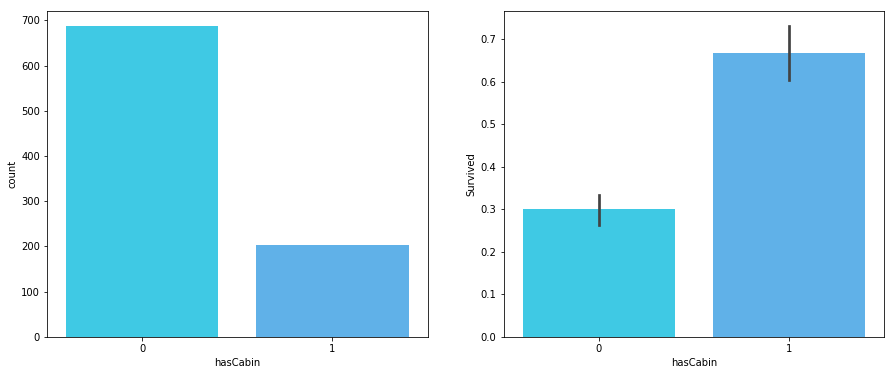

In [177]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
fig1_hascabin = sns.countplot(data=train, x='hasCabin', ax=axes[0])
fig2_hascabin = sns.barplot(data=train, x='hasCabin', y='Survived', ax=axes[1])

In [178]:
#Dropando a coluna Cabin

train.drop(labels='Cabin', axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,0,3,male,1,1,S,Mr.,3,2,0,9,0
1,1,1,female,2,4,C,Mrs.,6,2,0,8,1
2,1,3,female,1,1,S,Miss.,3,1,1,16,0
3,1,1,female,2,3,S,Mrs.,5,2,0,6,1
4,0,3,male,2,1,S,Mr.,3,1,1,6,0


In [179]:
test.drop(labels='Cabin', axis=1, inplace=True)
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,3,male,3,1,Q,Mr.,2,1,1,6,0
1,3,female,4,1,S,Mrs.,4,2,0,6,0
2,2,male,5,1,Q,Mr.,3,1,1,6,0
3,3,male,2,1,S,Mr.,2,1,1,6,0
4,3,female,2,1,S,Mrs.,5,3,0,7,0


In [180]:
#Por fim a feature Embarked
#Somente dois valores nulos

train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [181]:
#Como 644 de 889 estão marcadas como S, irei preencher com S também.
train['Embarked'] = train['Embarked'].fillna('S')

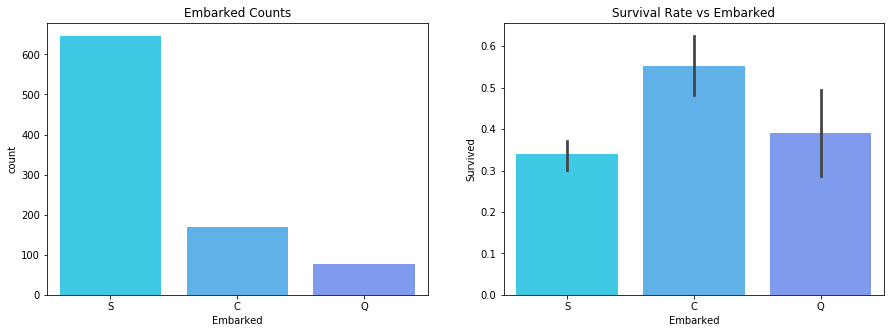

In [182]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Embarked Counts')
axes[1].set_title('Survival Rate vs Embarked')
fig1_embarked = sns.countplot(x=train.Embarked, ax=axes[0])
fig2_embarked = sns.barplot(x=train.Embarked, y=train.Survived, ax=axes[1])

In [183]:
#Verificando a proporção de sobreviventes - embarked class
print(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [184]:
print(train[['Embarked', 'Fare']].groupby(['Embarked'], as_index = False).mean())

  Embarked      Fare
0        C  3.470238
1        Q  1.233766
2        S  1.893189


In [185]:

X = train.iloc[:, 1:12].values
y = train.iloc[:, 0].values

In [186]:
#Por ultimo sobrou alguns dados categoricos, vamos utilizae o labelencoder
label_encoder_sex_tr = LabelEncoder()
label_encoder_title_tr = LabelEncoder()
label_encoder_embarked_tr = LabelEncoder()
X[:, 1] = label_encoder_sex_tr.fit_transform(X[:, 1])
X[:, 5] = label_encoder_title_tr.fit_transform(X[:, 5])
X[:, 4] = label_encoder_embarked_tr.fit_transform(X[:, 4])

In [187]:
#Splitando os dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17)

In [188]:
#Utilizando Feature Scaling

scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [190]:
#Testando Acuracias dos algoritmos
accuracies = []

In [191]:
#Regressão Logistica
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [192]:
lr_score = classifier.score(X_test, y_test)
accuracies.append(lr_score)
print(lr_score)

0.802631578947


In [193]:
#SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [194]:
svm_score = svm.score(X_test, y_test)
accuracies.append(svm_score)
print(svm_score)

0.802631578947


In [195]:
#Kernel SVM
k_svm = SVC(kernel='rbf')
k_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [196]:
k_svm_score = k_svm.score(X_test, y_test)
accuracies.append(k_svm_score)
print(k_svm_score)

0.809210526316


In [197]:
#KNN
knn = KNeighborsClassifier(p=2, n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [198]:
knn_score = knn.score(X_test, y_test)
accuracies.append(knn_score)
print(knn_score)

0.835526315789


In [199]:
#Random Forest
rdmf = RandomForestClassifier(n_estimators=20, criterion='entropy')
rdmf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [200]:
rdmf_score = rdmf.score(X_test, y_test)
rdmf_score_tr = rdmf.score(X_train, y_train)
accuracies.append(rdmf_score)
print(rdmf_score)
print(rdmf_score_tr)

0.809210526316
0.945872801083


In [203]:
#Preparando Submissao
test['Title'] = test['Title'].replace('Dona.', 'Mrs.')
test.head()


,Pclass,Sex,Age,Fare,Embarked,Title,Name_Len,FamilySize,isAlone,Ticket_Len,hasCabin
0,3,male,3,1,Q,Mr.,2,1,1,6,0
1,3,female,4,1,S,Mrs.,4,2,0,6,0
2,2,male,5,1,Q,Mr.,3,1,1,6,0
3,3,male,2,1,S,Mr.,2,1,1,6,0
4,3,female,2,1,S,Mrs.,5,3,0,7,0


In [205]:
#Atribuindo valores de teste
titanic_test = test.iloc[:, 0:11].values

In [206]:
# Convertendo os dados categoricos

titanic_test[:, 1] = label_encoder_sex_tr.transform(titanic_test[:, 1])
titanic_test[:, 5] = label_encoder_title_tr.transform(titanic_test[:, 5])
titanic_test[:, 4] = label_encoder_embarked_tr.transform(titanic_test[:, 4])

In [207]:
#Feature Scaling
titanic_test = scaler_x.transform(titanic_test)


In [214]:
y_pred = knn.predict(titanic_test)

In [ ]:
y_pred = rdmf.predict(titanic_test)

In [217]:
y_pred =k_svm.predict(titanic_test)

In [218]:
titanic_submission = pd.DataFrame({'PassengerId':passengerId, 'Survived':y_pred})

titanic_submission.to_csv('D:\\Users\\313432\\Desktop\\code\\Titanic\\ksvm_Titanic.csv', index=False)